In [59]:
import pandas as pd
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\91998\\Desktop\\tips.csv")

In [3]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [4]:
df.shape

(244, 7)

In [5]:
df.size

1708

In [6]:
df.index

RangeIndex(start=0, stop=244, step=1)

In [7]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [9]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [10]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [11]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size


# How Many WeekDays Present In Dataset

In [14]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    61
Fri     19
Name: day, dtype: int64

# How many dinners and lunches data are present in dataset

In [15]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [16]:
df['time'].value_counts()

Dinner    176
Lunch      67
Name: time, dtype: int64

<AxesSubplot:title={'center':'Dinner Vs Lunch Count'}>

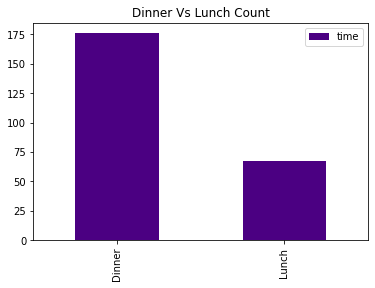

In [36]:
df['time'].value_counts().plot(kind='bar',color='indigo',title='Dinner Vs Lunch Count',legend=True)

# what is the Proportion of lunches and dinner in dataset

# When People pay more Bill during lunch or dinner

In [18]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [19]:
df.groupby('time').total_bill.sum()

time
Dinner    3660.30
Lunch     1154.47
Name: total_bill, dtype: float64

<AxesSubplot:title={'center':'Total Bill Pay vs Time'}, ylabel='total_bill'>

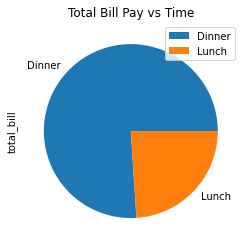

In [39]:
df.groupby('time').total_bill.sum().plot(kind='pie',legend=True,title='Total Bill Pay vs Time')

# When People pay more Tips during lunch or dinner

In [21]:
df.groupby('time').tip.sum()

time
Dinner    546.07
Lunch     183.51
Name: tip, dtype: float64

<AxesSubplot:xlabel='time'>

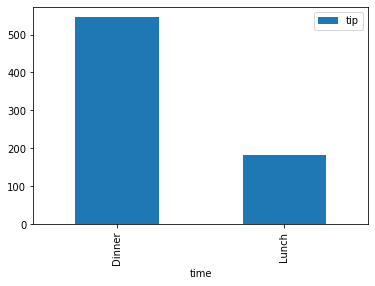

In [40]:
df.groupby('time').tip.sum().plot(kind='bar',legend=True)

# Similarly we can find for average tips that it is different for 
# (i)Smoker/NonSmoker
# (ii)Sex
# (iii)day
# (iv)size

In [23]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [24]:
df.groupby('smoker').tip.mean()

smoker
No     2.991854
Yes    3.019674
Name: tip, dtype: float64

<AxesSubplot:xlabel='smoker'>

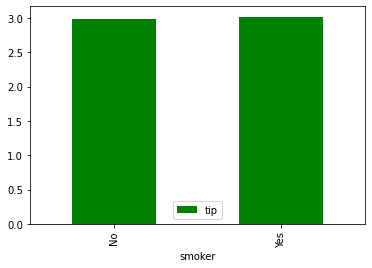

In [42]:
df.groupby('smoker').tip.mean().plot(kind='bar',color='green',legend=True)

In [26]:
df.groupby('sex').tip.mean()

sex
Female    2.843140
Male      3.089618
Name: tip, dtype: float64

<AxesSubplot:ylabel='tip'>

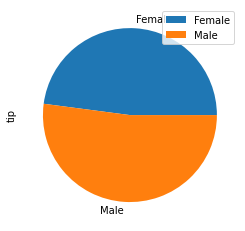

In [44]:
df.groupby('sex').tip.mean().plot(kind='pie',legend=True)

In [28]:
df.groupby('day').tip.mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.784098
Name: tip, dtype: float64

<AxesSubplot:xlabel='day'>

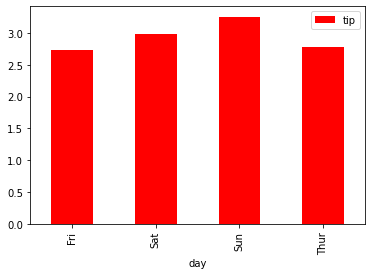

In [45]:
df.groupby('day').tip.mean().plot(kind='bar',color='red',legend=True)

In [30]:
df.groupby('size').tip.mean()

size
1    1.437500
2    2.586065
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

<AxesSubplot:xlabel='day'>

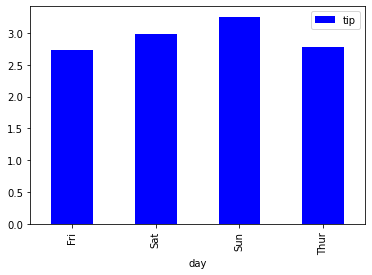

In [46]:
df.groupby('day').tip.mean().plot(kind='bar',color='blue',legend=True)

In [32]:
df.groupby(['smoker','sex']).tip.mean().unstack()

sex,Female,Male
smoker,,
No,2.773519,3.113402
Yes,2.960625,3.051167


<AxesSubplot:xlabel='smoker'>

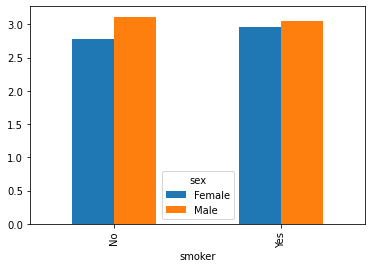

In [47]:
df.groupby(['smoker','sex']).tip.mean().unstack().plot(kind='bar',legend=True)

In [34]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


# Now Let's Create a new column to find out the % of Tip the compare to total bill

In [48]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [49]:
x=sum(df['tip'])*100/sum(df['total_bill'])

In [50]:
x

15.152956423671323

In [51]:
df['Tip%']=df['tip']/df['total_bill']

In [52]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size,Tip%
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447


# Relationship b/w total bill and tip 

<Figure size 1800x648 with 0 Axes>

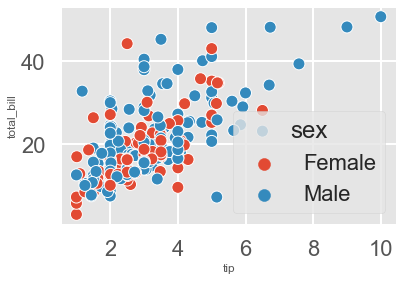

<Figure size 1800x648 with 0 Axes>

In [70]:
sns.scatterplot(x=df['tip'],y=df['total_bill'],hue=df['sex'])
style.use('ggplot')
plt.figure(figsize=(25,9))

<Figure size 1800x648 with 0 Axes>

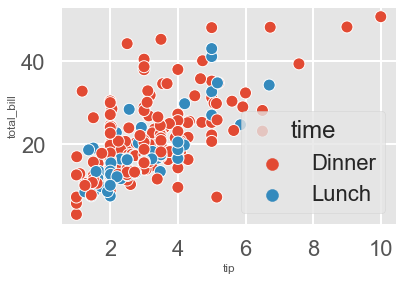

<Figure size 1800x648 with 0 Axes>

In [72]:
sns.scatterplot(x=df['tip'],y=df['total_bill'],hue=df['time'])
style.use('ggplot')
plt.figure(figsize=(25,9))

# Let's look at the distribution of total bill by time

In [73]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size,Tip%
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447


<AxesSubplot:xlabel='sex', ylabel='count'>

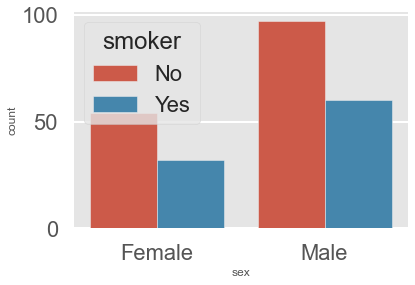

In [76]:
sns.countplot(x='sex',data=df,hue='smoker')

<AxesSubplot:xlabel='time', ylabel='total_bill'>

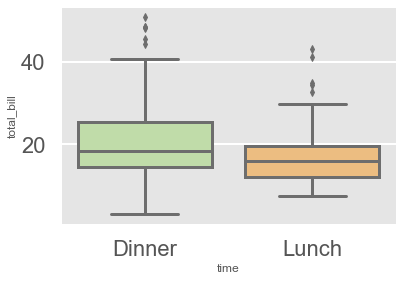

In [86]:
sns.boxplot(data=df,x='time',y='total_bill',palette='Spectral_r')

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

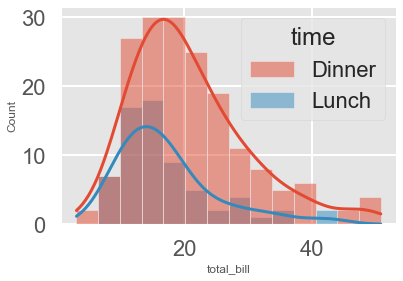

In [99]:
sns.histplot(data=df,x='total_bill',kde=True,hue='time')

# Finding the null values in dataset

<AxesSubplot:>

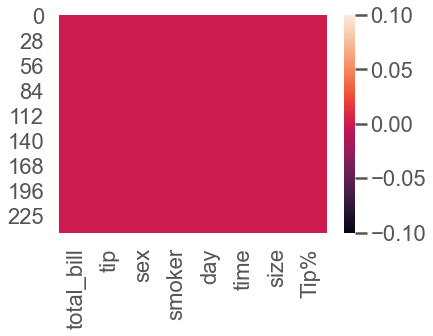

In [106]:
sns.heatmap(df.isnull())

# So as we can see our dataset is almost clean

# Finding the correlation and distribution for all the numeric varaibles by sex

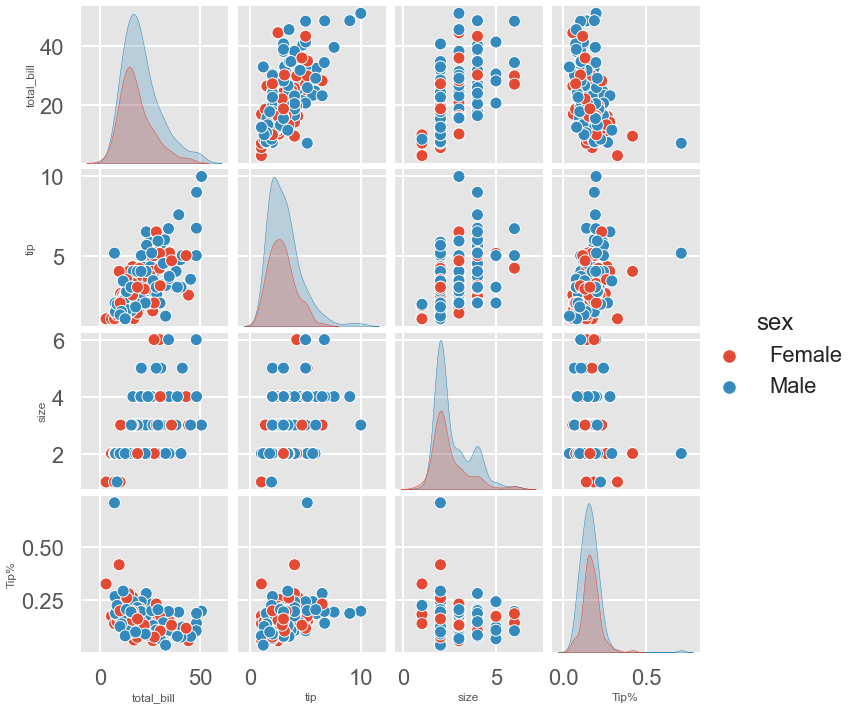

In [110]:
sns.pairplot(data=df,hue='sex')

# Finding the correlation  for all the numeric varaibles 

<AxesSubplot:>

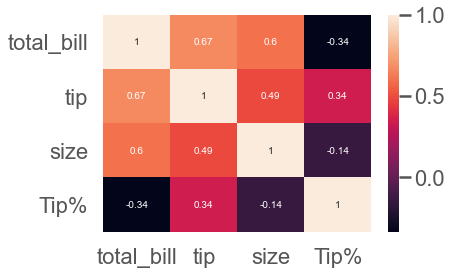

In [109]:
sns.heatmap(df.corr(),annot=True)